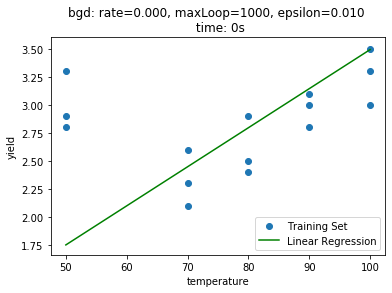

In [13]:
import gradient_descent
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

X, y = gradient_descent.loadDataSet('./data/temperature.txt')
m, n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1)

rate = 0.0001
maxLoop=1000
epsilon = 0.01
result, timeConsumed = gradient_descent.bgd(rate, maxLoop, epsilon, X, y)
theta, errors, thetas = result

# 拟合曲线
fittingFig = plt.figure()
title = 'bgd: rate=%.3f, maxLoop=%d, epsilon=%.3f \n time: %ds'%(rate,maxLoop,epsilon,timeConsumed)
ax = fittingFig.add_subplot(111, title=title)
trainingSet = ax.scatter(X[:, 1].flatten().A[0], y[:,0].flatten().A[0])

xCopy = X.copy()
xCopy.sort(0)
yHat = xCopy*theta
fittingLine, = ax.plot(xCopy[:,1], yHat, color='g')

ax.set_xlabel('temperature')
ax.set_ylabel('yield')

plt.legend([trainingSet, fittingLine], ['Training Set', 'Linear Regression'])
plt.show()

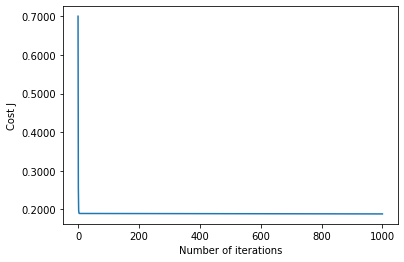

In [14]:
 # 绘制误差曲线
errorsFig = plt.figure()
ax = errorsFig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))
ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')
plt.show()

[[ 2.83333333]
 [-1.12813083]
 [ 1.2601571 ]]


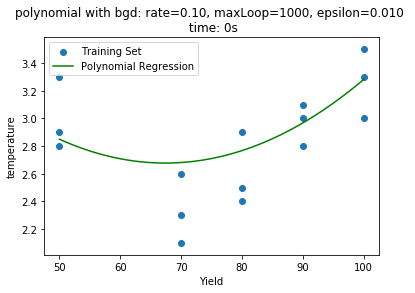

In [21]:
import polynomial_regression
srcX, y = gradient_descent.loadDataSet('data/temperature.txt');

m,n = srcX.shape
srcX = np.concatenate((srcX[:, 0], np.power(srcX[:, 0],2)), axis=1)
# 特征缩放
X = polynomial_regression.standardize(srcX.copy())
X = np.concatenate((np.ones((m,1)), X), axis=1)
rate = 0.1
maxLoop = 1000
epsilon = 0.01

result, timeConsumed = gradient_descent.bgd(rate, maxLoop, epsilon, X, y)
theta, errors, thetas = result

# 打印特征点
fittingFig = plt.figure()
title = 'polynomial with bgd: rate=%.2f, maxLoop=%d, epsilon=%.3f \n time: %ds'%(rate,maxLoop,epsilon,timeConsumed)
ax = fittingFig.add_subplot(111, title=title)
trainingSet = ax.scatter(srcX[:, 0].flatten().A[0], y[:,0].flatten().A[0])

print(theta)

# 打印拟合曲线
xx = np.linspace(50,100,50)
xx2 = np.power(xx,2)
yHat = []
for i in range(50):
    normalizedSize = (xx[i]-xx.mean())/xx.std(0)
    normalizedSize2 = (xx2[i]-xx2.mean())/xx2.std(0)
    x = np.matrix([[1,normalizedSize, normalizedSize2]])
    yHat.append(gradient_descent.h(theta, x.T))
fittingLine, = ax.plot(xx, yHat, color='g')
ax.set_xlabel('Yield')
ax.set_ylabel('temperature')

plt.legend([trainingSet, fittingLine], ['Training Set', 'Polynomial Regression'])
plt.show()

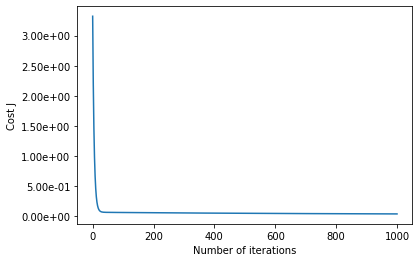

In [22]:
# 打印误差曲线
errorsFig = plt.figure()
ax = errorsFig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

plt.show()